<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">ML-3 Mid_ExamPaper_40 Marks </h1> 

### We combined two datasets in single CSV file. Use the below script to seperate the data.
#### Use data_clust for dimensionality reduction and clustering
#### Use data_recom for recommendation system.


import pandas as pd

data=pd.read_csv('dataset.csv')

data_clust=data.iloc[0:897,0:15]

data_recom=data.iloc[:,15:]

The column 'M3' talks about the relay postion, which is the target column. Don't use this while doing clustering and dimensionality reduction. 

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section A - 5 Marks </h1> 

### 1. Data Preprocessing 

1a. Read the dataset and perform required cleaning and preprocessing prior to model building. Justify the pre-processing approaches used.(3 Marks)

1b. Perform atleast one univariate and bivariate analysis for the data_clust (2 Marks)

1c. Keep the input features of data_clust (independent variables) in the variable "inp_data_dime: and output feature (M3) in te variable out.  

In [14]:
#1a. Read the dataset and perform required cleaning and preprocessing prior to model building. 
#    Justify the pre-processing approaches used. (3 Marks)
import pandas as pd
import numpy as np


data=pd.read_csv('dataset.csv')

data_clust=data.iloc[0:897,0:15]

data_recom=data.iloc[:,15:]

In [15]:
data_clust.head(2)

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,M3
0,0.0001,0.0001,0.000100,0.000100,10.533904,0.02,0.0001,0.0010,0.000100,0.000055,0.020028,0.004033,0.000120,0.020175,STOP
1,0.0001,0.0001,0.649088,10.533804,10.533904,0.20,0.0001,0.0001,0.000009,3.686851,2.043426,2.252111,2.755849,6.642700,RAISE


In [12]:
#data.columns=data.columns.str.strip()

In [16]:
#data.to_csv('dataset.csv',index=False)

In [17]:
data_clust.isnull().sum().sum()
# No missing values exist in this dataset

0

In [18]:
#Keep the input and output column seperate
inp_data_dime=data_clust.drop('M3',axis=1)
out=data_clust['M3']

For dimensionality reduction scaling is the must do pre-processing step. Students must perform scaling prior to dimensionality reduction. (Students may also performed outlier treatment, which is good to consider for awarding more marks). If they have not performed scaling, then mark must be reduced drastically.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_sc = scaler.fit_transform(inp_data_dime)
data_sc=pd.DataFrame(data_sc,columns=inp_data_dime.columns)

In [22]:
data_sc.head(2)

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
0,-2.473613,-1.31814,-2.525802,-1.432362,0.0,-0.099540,-1.219368,-1.219272,-2.513870,-1.454856,-0.219083,-0.763659,-3.274864,-1.569459
1,-2.473613,-1.31814,-2.281730,2.524661,0.0,-0.068158,-1.219368,-1.219369,-2.514227,2.503527,0.135991,1.087882,-2.068152,-0.464287


In [30]:
#1.b Perform univariate and bivariate analysis and remove any variable which is absolutely 
#    insignificant. (2 Marks)
inp_data_dime.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14
count,897.000000,897.000000,897.000000,897.000000,8.970000e+02,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.102562,0.046943,6.716206,3.813087,1.053390e+01,0.590930,15.174203,11.380670,0.636903,1.355093,1.268476,0.931242,7.478824,9.424846
std,0.041445,0.035557,2.660483,2.663513,1.084182e-13,5.738883,12.451183,9.338373,0.253457,0.931909,5.701704,1.214843,2.284943,5.995644
min,-0.000900,0.000100,0.000100,-0.807817,1.053390e+01,-130.236576,0.000100,0.000100,0.000009,-0.262316,-129.986635,-25.747386,0.000120,-119.725790
25%,0.075100,0.016100,4.794128,1.523688,1.053390e+01,0.165759,4.800100,3.600100,0.455020,0.553417,1.016933,0.568474,5.953814,8.326474
50%,0.102100,0.039100,7.110902,3.411969,1.053390e+01,0.398919,12.000100,9.000100,0.675049,1.214296,1.168410,0.838998,7.857244,9.666531
75%,0.132100,0.072100,9.008911,5.739776,1.053390e+01,1.013910,22.800100,17.100100,0.855230,2.024717,1.529315,1.292233,9.395223,10.964555
max,0.218100,0.149100,11.341721,10.533804,1.053390e+01,33.864220,51.200100,38.400100,1.076687,3.686851,34.116849,7.075999,11.376482,44.173466


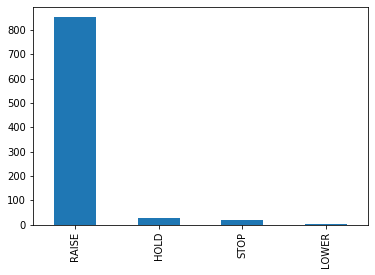

In [31]:
out.value_counts().plot(kind='bar')
#Imabalanced data

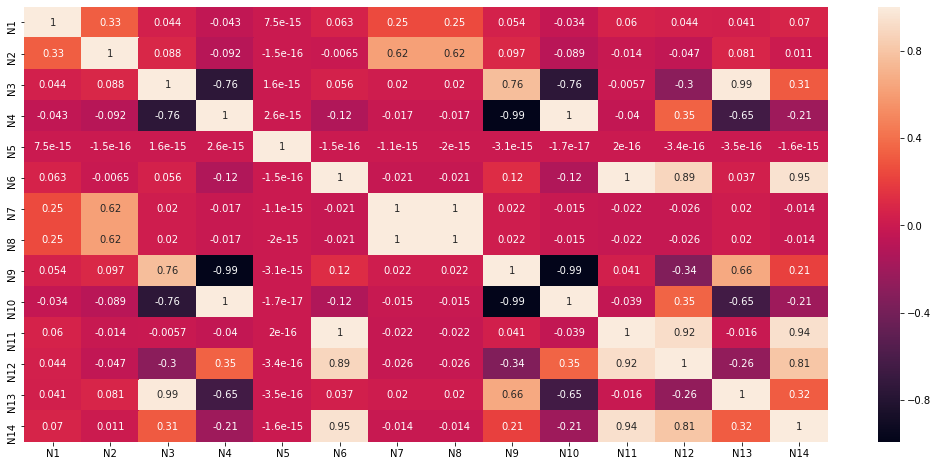

In [32]:
import seaborn as sb
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
sb.heatmap(inp_data_dime.corr(),annot=True)


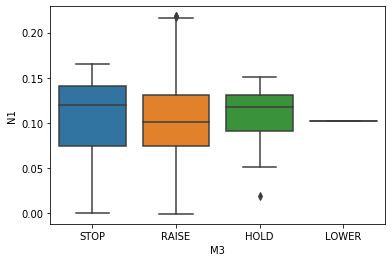

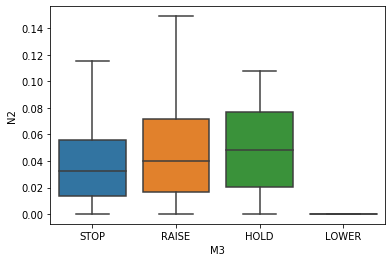

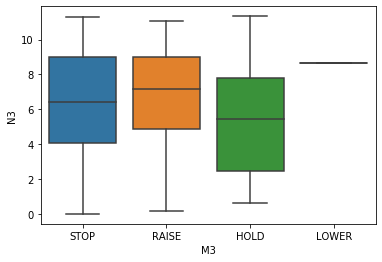

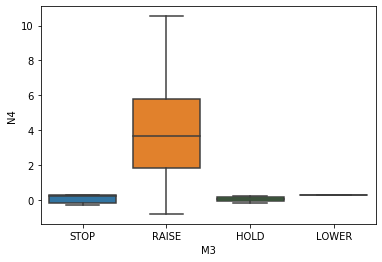

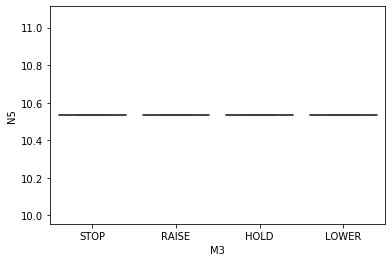

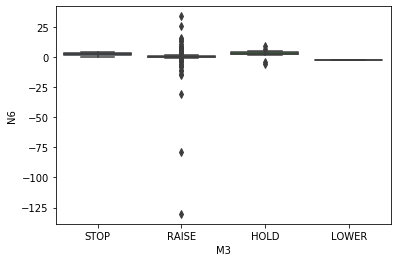

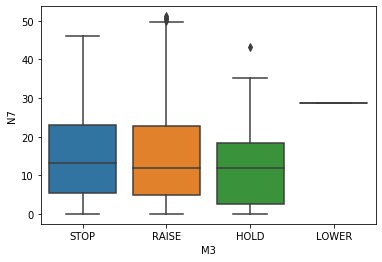

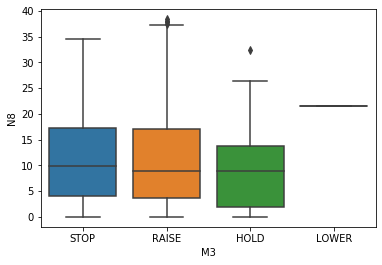

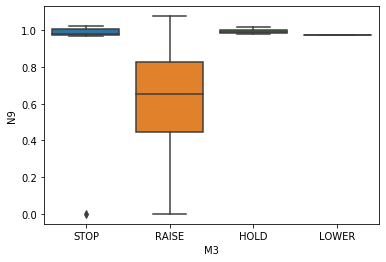

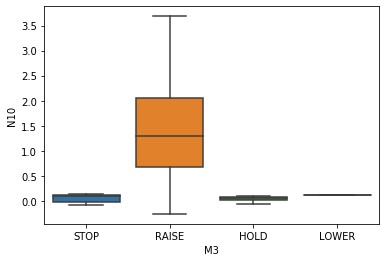

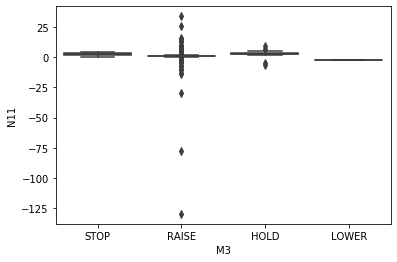

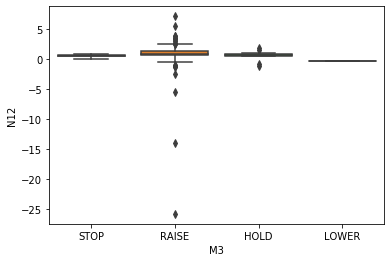

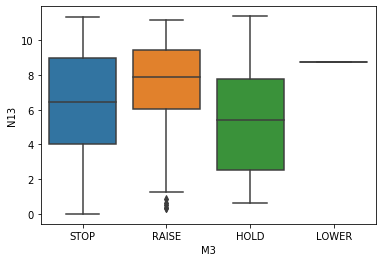

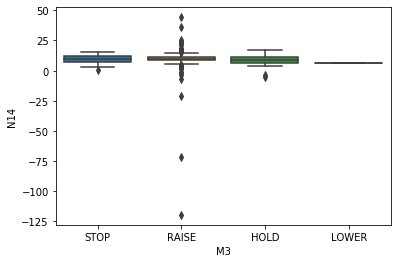

In [33]:
for i in inp_data_dime.columns:
    sb.boxplot(data_clust['M3'],data_clust[i])
    plt.show()

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section B - 10 Marks </h1> 

### 2. Apply K means clustering and identify the ideal value of K using elbow and silhoutee method

11661.000000000002
8755.920186339426
6209.027839799276
5023.080205344631
4481.727308859516
3984.056317021498
3570.962234315231
3345.839858803203


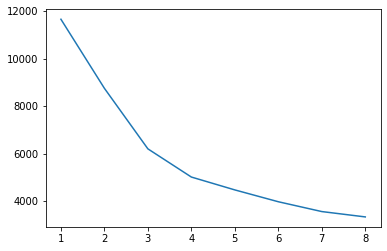

In [95]:
from sklearn.cluster import KMeans
wcss=[]
cl=[1,2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i,random_state=10)
    mod.fit(data_sc)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)    

In [ ]:
# at k =3, elbow point is visible. 3 groups can be well extracted from this dataset

In [96]:
sil=[]
from sklearn.metrics import silhouette_score
cl=[2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i)
    mod.fit(data_sc)
    sil.append(silhouette_score(data_sc,mod.labels_))
res=pd.DataFrame({'k':cl,'silhoutee':sil})
res

,k,silhoutee
0,2,0.312920
1,3,0.318097
2,4,0.303855
3,5,0.237326
4,6,0.255788
5,7,0.257910
6,8,0.259965


In [97]:
# at k =3, silhoutee score is high. 3 groups can be well extracted from this dataset
# students can also try the silhoutee plot for each cluster

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section C - 10 Marks </h1> 

### 3. Apply PCA on the data. How many PCs are required to reproduce the 95% charecteristics of original data. What is the top 5 features contributing in PC1 ?(5 marks)


### 4. Build the following ML model and compare its performace: (5 Marks)
    a. ML model with original inp_data_dime and out
    b. ML model with inp_data_dime_pca and out

    (Note: the pca components (inp_data_dime_pca) must capture the 95 percent varaince in the data) 

In [98]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = data_sc.shape[1])
pca_data = pca.fit_transform(data_sc)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 95 percent varaition is data is :  5  Varaince explained is  0.9634375924950878


Text(0, 0.5, 'Variance Ratio')

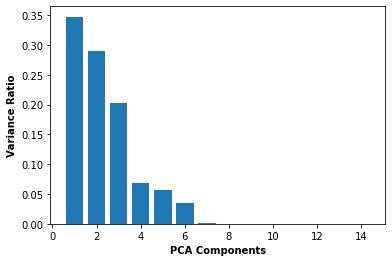

In [99]:
# Variance Ratio bar plot for each PCA components.
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [66]:
# PC1 is derived from first eigen vector
e1=pd.DataFrame(pca.components_[0,:]) # first eigen vector
e1.index=data_sc.columns
e11=np.abs(e1)
e11.sort_values(0,ascending=False).head(5) # Top 5 features contributing in PC1

,0
N9,0.447960
N4,0.446419
N10,0.446194
N3,0.429434
N13,0.395936


In [85]:
### 5. Build the following ML model and compare its performace: (5 Marks)
    #a. ML model with original inp_data_dime and out
    #b. ML model with inp_data_dime_pca and out
    #(Note: For pca and svd use the number of components which captures the 95 percent of variance) 
    
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

xtrain,xtest,ytrain,ytest=train_test_split(data_sc,out,test_size=0.2,random_state=48)
rf=RandomForestClassifier(random_state=48)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('The number of input feature ',xtrain.shape[1])
print(classification_report(ytest,ypred))

The number of input feature  14
              precision    recall  f1-score   support

        HOLD       1.00      0.80      0.89        10
       RAISE       0.99      1.00      1.00       166
        STOP       0.60      0.75      0.67         4

    accuracy                           0.98       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.99      0.98      0.98       180



C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(pca_data[:,:5],out,test_size=0.2,random_state=48)
rf=RandomForestClassifier(random_state=48)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print('The number of PCA components ',xtrain.shape[1])
print(classification_report(ytest,ypred))

The number of PCA components  5
              precision    recall  f1-score   support

        HOLD       0.80      0.40      0.53        10
       RAISE       0.95      1.00      0.97       166
        STOP       0.00      0.00      0.00         4

    accuracy                           0.94       180
   macro avg       0.58      0.47      0.50       180
weighted avg       0.92      0.94      0.93       180



C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\tksen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
# PCA is producing reasonable performance with only 5 components(transformed features)
# representation for two levels (STOP and Hold) in the output column is very low.

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Section D - 15 Marks </h1> 

### 5. Recommondation Systems
### Build collaborative recommendation engine to predict a rating for an specific item by the specific user. Measure the model quality in terms of RMSE

In [128]:
#!pip install scikit-surprise

In [101]:
data_recom.head(2)

,userId,productId,Rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1


In [105]:
from surprise import KNNWithMeans,SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split,cross_validate
#data_recom=pd.read_csv('recommendation_mini.csv')
ratings = data_recom
reader = Reader(rating_scale=(1, 5))

In [108]:
rating_data = Dataset.load_from_df(ratings[['userId','productId','Rating']],reader)
[trainset, testset] = train_test_split(rating_data, test_size=.15,shuffle=True)

In [109]:
trainsetfull = rating_data.build_full_trainset()
print('Number of users: ', trainsetfull.n_users, '\n')
print('Number of items: ', trainsetfull.n_items, '\n')

Number of users:  1988 

Number of items:  59 



In [110]:
alg=SVDpp()
alg.fit(trainsetfull)  # Student can use any other algo 

In [127]:
#Predict the rating for an Item 059400232X by the user A2CX7LUOHB2NDG
alg.predict(uid = 'A2CX7LUOHB2NDG', iid ='059400232X')

Prediction(uid='A2CX7LUOHB2NDG', iid='059400232X', r_ui=None, est=4.367620677870198, details={'was_impossible': False})

In [126]:
results = cross_validate(
    algo = alg, data = rating_data, measures=['RMSE'], 
    cv=3)
results['test_rmse'].mean()

1.2585196552579956

In [ ]:
# Model's RMSE is 1.2585